In [34]:
import numpy as np
import math
import random
import numpy.linalg as la
import matplotlib.pyplot as plt


In [35]:
# Parameters of lattice site
n_sites= 20
n2= 2*n_sites
threshold_e= 1E-6
state_variables={ 'n_h': 3.0,    # nearest neighour hopping
                  'Delta' : 3.0, # parining term 
                  'c_h':0.0      # chemical potential 
                }


In [36]:
# now we define hamiltonian matrix for our system
def hamiltonin(n_sites,state_variables):
 matrix = np.zeros([n2,n2])
 x= 0.5*(state_variables['n_h']- state_variables['Delta'])
 y= 0.5*(state_variables['n_h']+ state_variables['Delta'])
 
 for i in range(n_sites-1):
  matrix[2*i,2*i+1] =x
  matrix[2*i+1,2*i] =-x
  matrix[2*i-1,2*i+2] =-y
  matrix[2*i+2,2*i-1] =y
  matrix[2*i-1,2*i] =state_variables['c_h']
  matrix[2*i,2*i-1] =-state_variables['c_h']
 
 matrix[2*(n_sites-1)-1,2*(n_sites-1)]= state_variables['c_h']
 matrix[2*(n_sites-1),2*(n_sites-1)-1]= -state_variables['c_h']
 matrix = 1j*matrix
 return matrix

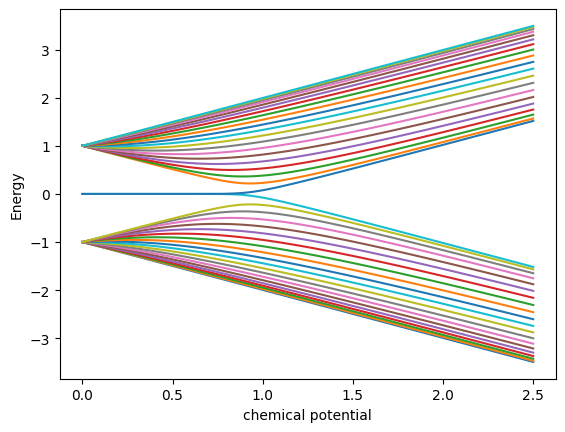

In [37]:
# Calculating energy as function of potential

var_ch= np.linspace(0,2.5,101)
energy= np.zeros([len(var_ch),n2])

for i in range(len(var_ch)):
    energy[i]= la.eigh(hamiltonin(n_sites,state_variables={'n_h': 1.0,'Delta':1.0,'c_h': var_ch[i]}))[0]

for i in range(n2):
 plt.plot(var_ch,energy[:,i])

plt.ylabel('Energy')
plt.xlabel('chemical potential')
plt.show()
